## Model Training

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2024-03-06 00:45:32.982935: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 00:45:33.200423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 00:45:33.200466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 00:45:33.245098: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 00:45:33.364766: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 00:45:33.366600: I tensorflow/core/platform/cpu_feature_guard.cc:1

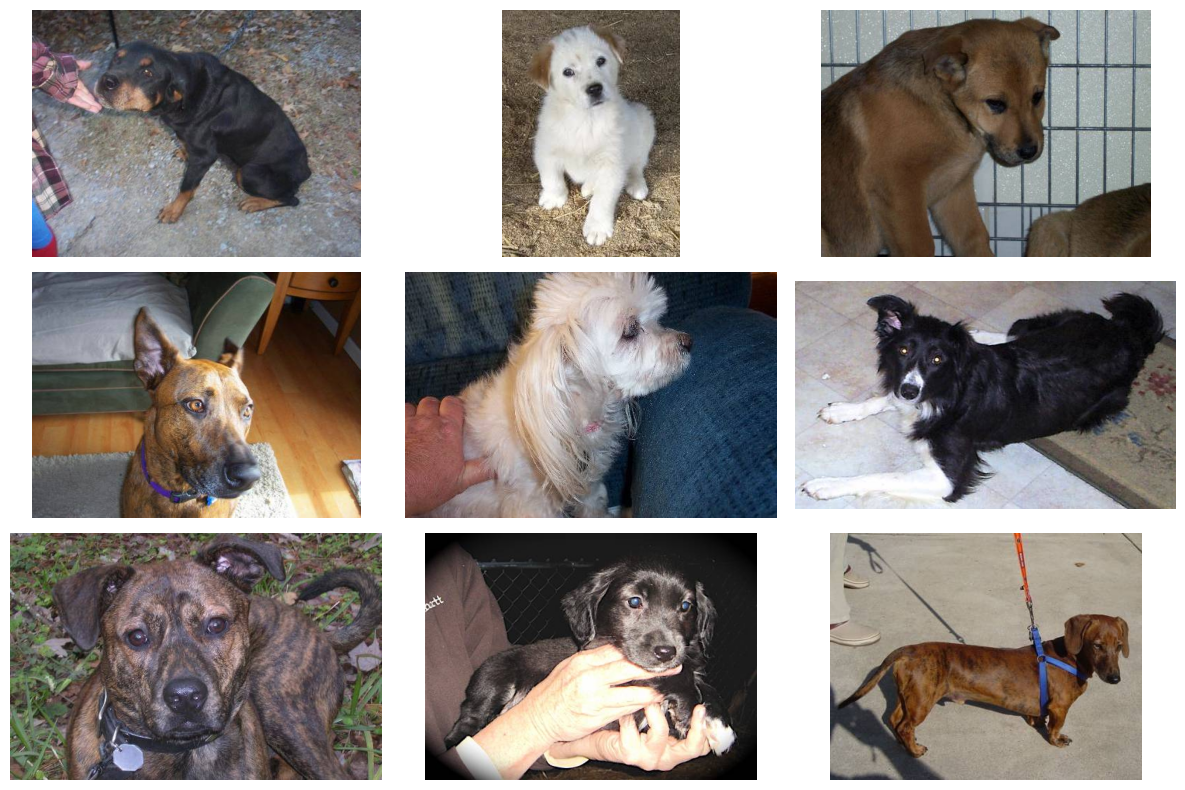

In [2]:
data_dir = "../data/raw"

dog_subfolder = os.path.join(data_dir, "dog")
dog_image_files = os.listdir(dog_subfolder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path) 
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

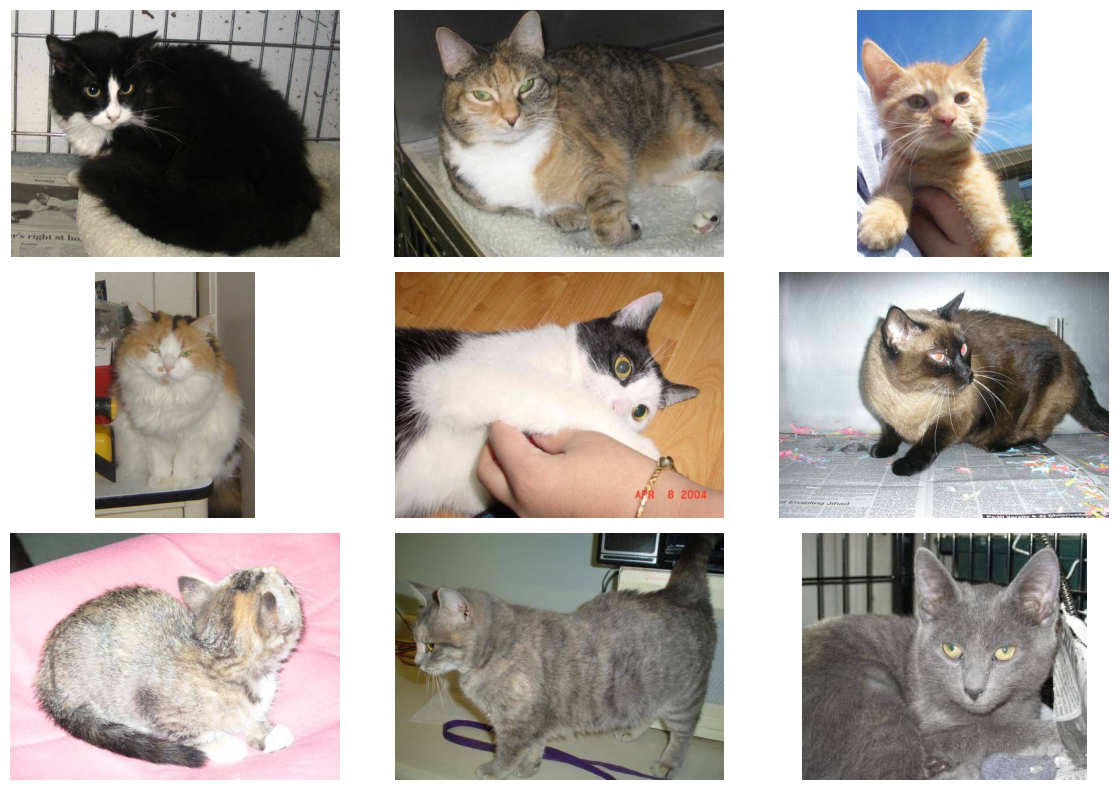

In [3]:
cat_subfolder = os.path.join(data_dir, "cat")
cat_image_files = os.listdir(cat_subfolder)

cat_images = []
for i in range(9):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

2024-03-06 00:45:42.946582: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-06 00:45:42.946995: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [7]:
# Train the Model
model.fit(train_data, epochs = 1)

782/782 [==============================] - 160445s 205s/step - loss: 6.3744 - accuracy: 0.5042


In [8]:
from keras.preprocessing import image
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/image-classifier.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])



Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5038
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ../models/image-classifier.h5


/home/alamo/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 862s 9s/step - loss: 0.6938 - accuracy: 0.5038 - val_loss: 1.3863 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5047
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 866s 9s/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 1.3875 - val_accuracy: 1.0000
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4897
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 915s 9s/step - loss: 0.6938 - accuracy: 0.4897 - val_loss: 1.3863 - val_accuracy: 0.0000e+00


1/1 [==============================] - 0s 80ms/step
dog


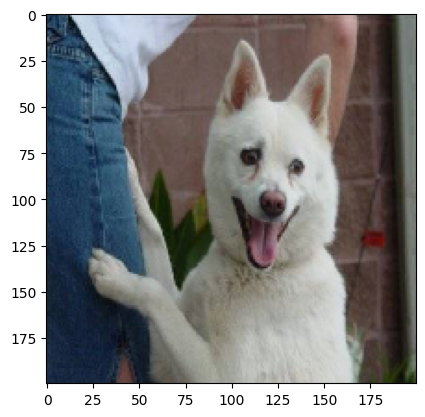

In [10]:
img = image.load_img("../data/raw/test/66.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

In [11]:
model.save("../models/refined_model.h5")

/home/alamo/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
